### **Harris Corner Detector**
* Harris detector is one of the most common corner detectors that you'll encounter in the computer vision world.
* It is **quite fast** (not as fast as the FAST keypoint detector), but **more accurately marks regions as corners**.
* **Corners** are **regions in the image with large variation in intensity in all the directions**.
* It basically **finds the difference in intensity for a displacement of in all directions**.


In [24]:
# prompt: add an image from google drive and display it

from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* This is expressed as below,

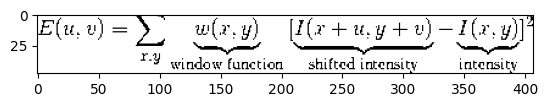

In [25]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/HARRIS_KeyPoint_Detection/EQ1.png'

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

* **Window function** is either a **rectangular window** or **Gaussian window** which gives weights to pixels underneath.
* We have to **maximize this function E(u, v)** for **corner detection**.
* That means, we **have to maximize the second term**.
* **Applying Taylor Expansion** to above equation and using some mathematical steps (please refer any standard text books you like for full derivation), we get the final equation as,


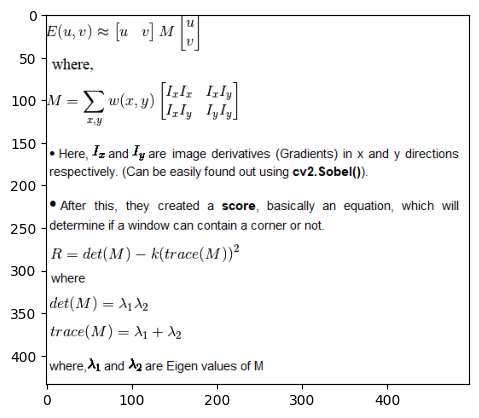

In [11]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/HARRIS_KeyPoint_Detection/EQ2.png'

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

### **Steps involved to compute corners** are,
1.   **Compute the gradient magnitude** representation of an image,
2.   Use these gradient magnitude representations to **construct a matrix M**.
3.   Now that M is defined, we can take the **eigenvalue decomposition of the matrix, leaving us a “score” indicating the “cornerness”** (i.e. a value to quantify and score how much of a “corner” the region is).
4.   Again, this **process is done for each and every pixel** in the input image.

We can use the following list of possible values to help us determine if a **region is a keypoint or not**:
1.	If **|R| is small**, then we are **examining a “flat” region** of the image. Thus, the **region is not a keypoint**.
2.	If **R\< 0** , which happens when **λ1 >> λ2** or **λ2 >> λ1** , then the **region is an “edge”**. Again, the **region is not a keypoint**.
3.	The only time the region can be considered a keypoint is when **both |R|  is large**, which corresponds to **λ1  and when λ2 being approximately equal**. If this holds, then the **region is indeed a keypoint**.


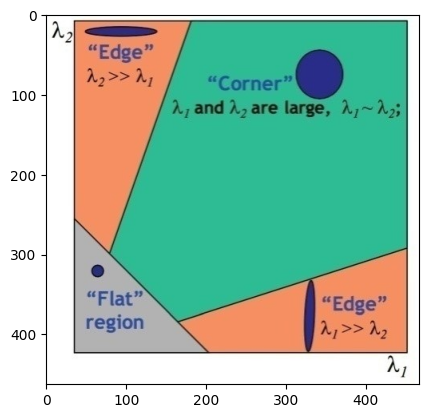

In [12]:
# Load the image from Google Drive
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/HARRIS_KeyPoint_Detection/Map.jpg'

# Read the image
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.show()

In [26]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import cv2

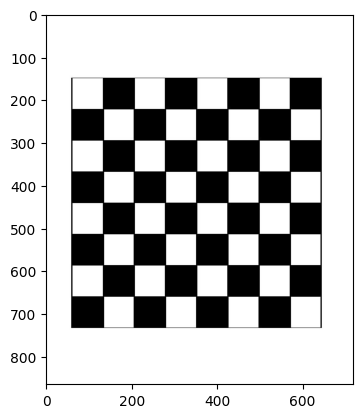

In [27]:
# load the image and convert it to grayscale
image_path = '/content/drive/MyDrive/MIT/Work/Machine_Learning/Google_Colab/Machine_Learning/Image_Descriptors/HARRIS_KeyPoint_Detection/Chess_board.jpg'
image = cv2.imread(image_path)
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display the image
plt.imshow(orig)
plt.show()

In [15]:
# modify the data type
# setting to 32-bit floating point
gray = np.float32(gray)

* OpenCV has the function **cv2.cornerHarris()** for this purpose. Its arguments are :
	1. **img** - Input image, it should be grayscale and float32 type.
	2. **blockSize** - It is the size of neighbourhood considered for corner detection
	3. **ksize** - Aperture parameter of Sobel derivative used.
	4. **k** - Harris detector free parameter in the equation.


# of keypoints: 865
0.10844569


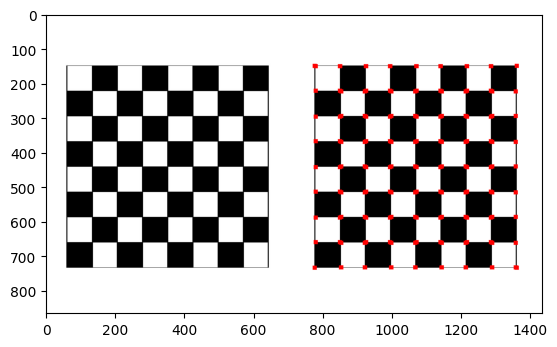

In [28]:
# detect Harris keypoints in the image
dst = cv2.cornerHarris(gray,2,3,0.04)
print("# of keypoints: {}".format(len(dst)))
print(dst.max())

#result is dilated for marking the corners, not important
for i in range (0,5):
  dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
image[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(np.hstack([orig, image]))
plt.show()